In [2]:
import pandas as pd
!pip install xlrd
df=pd.read_excel('BostonData.xlsx')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Drop the non required column

In [3]:
df.drop(['CHAS'],axis=1,inplace=True)

In [4]:
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Feature Selection

In [7]:
X=df[['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']].values

In [8]:
y=df['MEDV'].values

## Scaling

In [10]:
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X)

## Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)

## Algorithm - Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
pred=lm.predict(X_test)

In [14]:
pred

array([11.02094647, 22.7476107 , 20.2632739 , 20.10980627, 29.6482859 ,
       16.5077655 , 23.72213046, 36.74873745, 32.15129853, 18.54347494,
       26.79129125, 30.82520705, 24.67819781, 15.73803157, 19.1784163 ,
       21.54634328, 18.33136262, 22.34058935, 19.65160601, 20.83718293,
       28.67298024, 31.94306876, 24.01533424, 18.86886847, 25.9248172 ,
       17.73868058, 24.57086504, 27.00970501, 21.64219517, 16.15911333])

### Accuracy 

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.7897772791517508

## Visualization

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

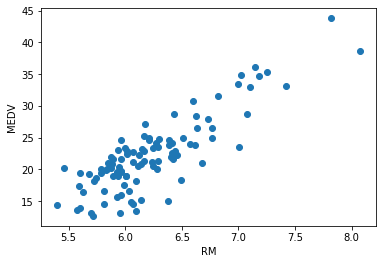

In [40]:
plt.scatter(df.RM,df.MEDV)
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.show()

## Polynomial Regression

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly=PolynomialFeatures(degree=5)
train_x_poly=poly.fit_transform(X_train)
lm=linear_model.LinearRegression()
train_y_=lm.fit(train_x_poly,y_train)
test_x_poly=poly.fit_transform(X_test)
test_y_=lm.predict(test_x_poly)

In [42]:
r2_score(y_test,test_y_)

0.5871168461389156